In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 4)
gr ,  re,  bl,  yl,  bk = '#32AF4B', '#AF324B', '#323BAF', '#AFAF4B', '#000000'
lgr, lre, lbl, lyl, lbk = '#ccffcc', '#ffcccc', '#ccccff', '#AFAFBB', '#333333'

filter:  None
method:  CentralDifference


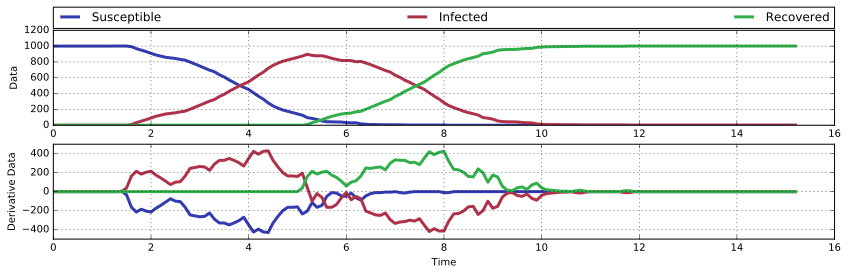

In [2]:
from DataHandler import *
db = DataBaseObject(db='sim_v2_1_16_2017')
data = db.getSINDyReadyData()
D = Differentiate(data) 
D.DerivativePlot(fignum=2,labels=["Susceptible","Infected","Recovered"],
                   colors=[bl,re,gr],
                   title="")

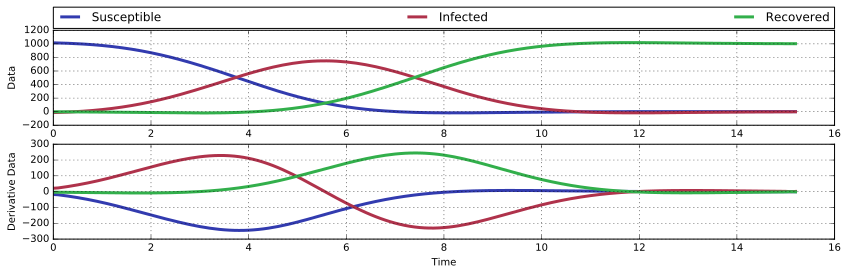

In [3]:
D.IIRFilter(order=2,cutoff=0.03)
D.DerivativePlot(fignum=2,labels=["Susceptible","Infected","Recovered"],
                   colors=[bl,re,gr],
                   title="")

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


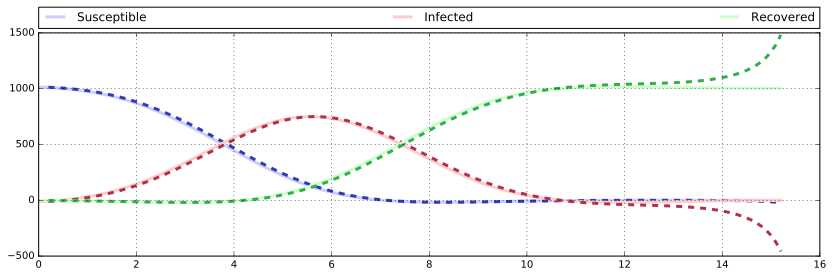

In [4]:
from SINDy import *
sind = SINDy(data=data,polyorder=2,usesine=False,cutoff=0.01)
sind.SetDerivative(np.insert(D._dx,0,D._t,axis=1))
sind.RunSINDy(simulate=True)
sind.SINDyPlot(fignum=3,statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[lbl,lre,lgr],
              simcolors =[ bl, re, gr])

In [5]:
sind.StringModelView(StateVariables=["S","I","R"])

dS/dt =  117934209.781 +  117.783 S^2  +  235.838 I S  +  237.704 S R  +  118.056 I^2  +  237.979 I R  +  119.923 R^2 
dI/dt =  157513.857 S  +  157320.364 I  +  150155.202 R 
dR/dt =  80371.179 S  +  80838.859 I  +  89868.060 R 
